# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Update 02

## Violence non-violence detection - Checking annotation code

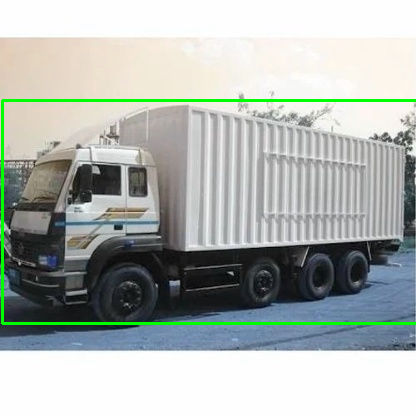

In [ ]:
import cv2
import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/drive/MyDrive/CSE465 Project/xml_dataset/train/images/102.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the XML annotation
xml_path = '/content/drive/MyDrive/CSE465 Project/xml_dataset/train/images/102.xml'
tree = ET.parse(xml_path)
root = tree.getroot()
bndbox = root.find('object/bndbox')

# Extract the bounding box coordinates
xmin = int(bndbox.find('xmin').text)
xmax = int(bndbox.find('xmax').text)
ymin = int(bndbox.find('ymin').text)
ymax = int(bndbox.find('ymax').text)

# Draw the bounding box on the image
color = (0, 255, 0)  # Green color (R, G, B)
thickness = 2
cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), color, thickness)

# Show the image with bounding box
cv2_imshow(image_rgb)


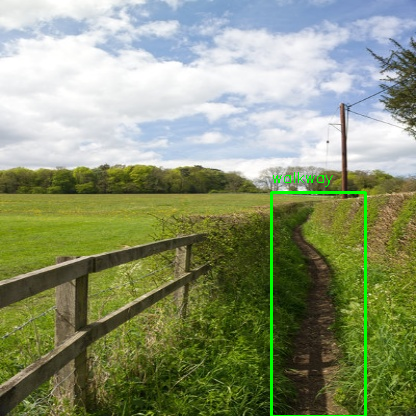

Normalized Annotation: [1.2098214285714286, 0.8571428571428571, 1.6294642857142858, 1.8571428571428572]
Class Label: walkway


In [ ]:
import cv2
import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow

# Function to draw the bounding box on the image and show the class label
def draw_bounding_box(image_path, xml_path, input_shape):
    # Load the image
    image = cv2.imread(image_path)

    # Load the XML annotation
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Find the class label from the XML annotation
    class_label = root.find('object/name').text

    # Extract the bounding box coordinates
    bndbox = root.find('object/bndbox')
    xmin = int(bndbox.find('xmin').text)
    xmax = int(bndbox.find('xmax').text)
    ymin = int(bndbox.find('ymin').text)
    ymax = int(bndbox.find('ymax').text)

    # Normalize the bounding box coordinates to the range [0, 1]
    annotation = [xmin / input_shape[0], ymin / input_shape[1],
                  xmax / input_shape[0], ymax / input_shape[1]]

    # Determine the color of the bounding box based on the class label
    box_color = (0, 255, 0)  # Green color for NonViolence
    if class_label == "Violence":
        box_color = (0, 0, 255)  # Red color for Violence

    # Draw the bounding box on the image
    thickness = 2
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), box_color, thickness)

    # Draw the class label on the image
    cv2.putText(image, class_label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

    # Show the image with bounding box and class label
    cv2_imshow(image)

    return annotation, class_label

# Provide the image and XML annotation path
image_path = '/content/drive/MyDrive/CSE465 Project/xml_dataset/train/images/119.jpg'
xml_path = '/content/drive/MyDrive/CSE465 Project/xml_dataset/train/images/119.xml'

# Define the input shape of the model (not used here, only for reference)
input_shape = (224, 224, 3)

# Call the function to draw the bounding box on the image and show the class label
normalized_annotation, class_label = draw_bounding_box(image_path, xml_path, input_shape)
print("Normalized Annotation:", normalized_annotation)
print("Class Label:", class_label)
